In [1]:
from utils import *

In [74]:
event_0 = importpbdatapandas(0)

In [78]:
all_events = [importpbdatapandas(i) for i in range(0, 22948)]

In [124]:
# # 3d surface plot the data
# from mpl_toolkits import mplot3d

# phi = event_0to999['phi']
# eta = event_0to999['eta']

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(phi, eta, s)
# plt.show()

In [51]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=3.15, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] >= rangex or instance['phi'] <= -rangex or instance['eta'] >= rangey or instance['eta'] <= -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx) 
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data.T


# ax.set_xlabel('phi')
# ax.set_ylabel('eta')

In [20]:
event_0_x, event_0_y, event_0_z = surfacedata(event_0, dx=0.5, dy=0.5, rangex=3.14, rangey=4)

In [80]:
def d_data(event):

    deta=np.array([])
    dphi=np.array([])
    for i in range(len(event)-1):
        for j in range(i+1,len(event)-1):
            k = event['phi'][i]-event['phi'][j]
            if k < -math.pi:
                k += 2*math.pi
            elif k > math.pi:
                k -= 2*math.pi
            deta=np.append(deta,(event['eta'][i]-event['eta'][j]))
            dphi=np.append(dphi,k)
    
    df = pd.DataFrame(np.vstack([dphi,deta]).T,columns=['phi','eta'])
    return df
    

In [81]:
event_0_ddata = d_data(event_0)
# to pandas with 'phi' and 'eta' as index
print(event_0_ddata.shape)


(29403, 2)


In [128]:
event_0_dx, event_0_dy, event_0_dz = surfacedata(event_0_ddata, dx=0.4, dy=0.4, rangex=3.15, rangey=6)
#normalize event_0_dz
event_0_dz = event_0_dz/sum(event_0_dz)

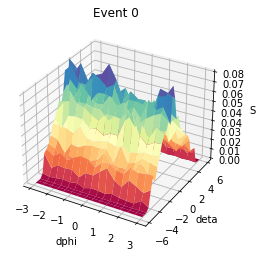

In [131]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0_dx
Y = event_0_dy
X, Y = np.meshgrid(X, Y)
Z = event_0_dz

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.08)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0_d.png')
plt.show()

In [105]:
def addhist(start, end):
    if start < 0 or end > 22947 or start < 0 or end > 22947:
        print("event number out of range")
        return
    if start > end:
        print("start_event_index > end_event_index")
        return


    init_ddata = d_data(all_events[start])
    dx, dy, dz = surfacedata(init_ddata, dx=0.25, dy=0.25, rangex=3.15, rangey=6)
    for i in range(start+1, end+1):
        i_ddata = d_data(all_events[i])
        i_dx, i_dy, i_dz = surfacedata(i_ddata, dx=0.25, dy=0.25, rangex=3.15, rangey=6)
        dz = dz + i_dz
    
    #normalize dz so volume add up to 1
    dz = dz/sum(dz)
    
    return dx, dy, dz

In [120]:
event_0to9x,event_0to9y, event_0to9z = addhist(0,99)

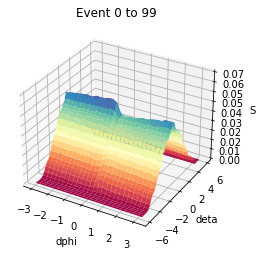

In [121]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0to9x
Y = event_0to9y
X, Y = np.meshgrid(X, Y)
Z = event_0to9z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.07)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0 to 99')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0to99_d.png')
plt.show()